University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2022  
Luigi Acerbi  

# Home exam

**Deadline:** Friday 28 October at 23:55

- Please return your solutions for Problem 2 as a separate Python source file `problem2.py` and the others in this notebook to Moodle.
- **You must answer Problems 1-3. Please answer 2 out of 3 of the remaining problems (Problems 4-6).**
- Each problem is worth 6 points. The maximum score is 30 points.
- Please note that this exam is *not* teamwork. You must find the answers to the questions just by yourself with no help from others.
- Please write your full name, email address and student ID number in the cell below. By doing so, you are confirming that you are the only author of the answers and solutions in the submitted notebook and code:

## Home exam taker

- **Name:** Victor Manuel Yeom Song
- **Email address:** victor.yeomsong@helsinki.fi
- **Student ID:** 015148944

## General instructions (IMPORTANT!)

1. When returning your solutions, please leave your code and output in the notebook. You will not get points for results that are not included in the notebook even if they could be obtained by running the code. You will not get results if you provide the solutions without the code used to generate them.
2. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
3. Please make sure there are no dependencies between solutions to different problems.
4. Please make sure that your notebook will not depend on any local files.
5. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (e.g., `npr.seed()`!).
6. Please make your code readable. You are not required to write high-quality code, but make some effort to clean it up and add comments when necessary so that it is easy to follow what's going on. (But do not exceed in the opposite direction of explaining every single line.)
7. Make sure you only use the functions specified in the statement of each problem. You can use `matplotlib` plotting in all problems if you wish.
8. The problems are meant to be solved based on contents of the course. You can reuse functions from the class exercises. You should not search for solutions online and in any case must not use any solutions possibly found.
9. **Remember to fill in your full name, email address and student ID in the cell above.** (If for some reason you don't have a student ID yet, leave that empty.)

---

## COMPULSORY PROBLEMS

---

## 1. Check and fix my MCMC (COMPULSORY)

Which of the MCMC algorithms presented below will *eventually* converge to produce samples from the target probability distribution defined by the corresponding `ltarget(x)` functions?

- Justify your answers (both positive and negative) briefly.
- For each sampler that will not converge to the correct distribution, suggest a change to fix it to converge to the intended target distribution.
- You should never change the target distribution. 
- Your fix should keep the function `sample_q(x)` for drawing samples from the proposal the same, if possible. **Only change it if there is no other way to fix the sampler**.

### Problem descriptions

In all cases, we assume we are using a Metropolis-Hastings sampler that takes three arguments: 
- the log-target density `ltarget(x)`;
- the proposal density `eval_logq(xp, x)` evaluating $\log q(x';x)$, i.e. the log probability of proposing $x'$ denoted by `xp` when the current state is $x$; 
- a function `sample_q(x)` to draw samples $x'$ from the proposal $q(x' ; x)$.

We assume that the sampler is initialized at a valid point `x0` (for which the log-target is not `-np.inf`). The sampler will take `2*n` samples, throwing away the first `n` for warmup. `n` is assumed to be a sufficiently large number to ensure convergence *if* the algorithm is correct. For some problems, the required `n` might be astronomically large, but that's fine: this problem is not asking about efficiency, but about *correctness*.

The following snippet of code is used to draw the samples and compute the acceptance probability:
``` {python}
import numpy as np
import numpy.random as npr
import scipy.stats as sps

xp = sample_q(x)
accrate = np.minimum(1, np.exp(ltarget(xp) + eval_logq(x, xp) - ltarget(x) - eval_logq(xp, x)))
```

Many samplers are based on a symmetric proposal with $q(x';x) = q(x;x')$ and define `eval_logq(xp, x) = 0`. This is OK if the proposal really is symmetric, because then `eval_logq(x, xp) == eval_logq(xp, x)`, making the corresponding terms to cancel out in the above acceptance rate.

*Notes and hints*: 
- Since the sampler is a Metropolis-Hastings sampler, what you need to check is mostly two things: (1) whether the log-proposal pdf is implemented correctly, and (2) if the proposal would allow the chain to (eventually) explore the entire target distribution.
- **You are not required to run any code: answering the questions and providing code for the fixed functions is enough.**
- Still, as a way to double-check your hypotheses and answers, sometimes it can be useful for you to write code and run the proposed Metropolis-Hastings samplers on the given problems. Write this test code in a separate file, not here.
- For example, plot a normalized histogram of the samples obtained from the MCMC run overlaid on top of the (normalized) true target pdf.
- However, note that the problem is asking if a sampler will *eventually* converge. If the sampler would converge with an astronomically large `n`, it would still count as converging for the purpose of this question. For some problems, you might be unable to see convergence by simply running the sampler on your computer (unless you can run it for an astronomically large `n`), in which case you will have to think asymptotically. In particular, finite-time diagnostic like $\hat{R}$ are not necessarily informative about *asymptotic* convergence.
- Do **not** submit your test code or test plots (those are only useful checks for you). Below, only write your answer and a brief justification including, if needed, a snippet of code for what needs to be fixed.

### The problems:


Case 1:
``` {python}
    def ltarget1(x):
        if np.abs(x) < np.pi:
            return x*np.cos(x)
        else:
            return -np.inf

    def eval_logq1(xp, x):
        return 0

    def sample_q1(x):
        return npr.uniform(-np.pi/2, np.pi/2)
```

Case 2:
``` {python}
    def ltarget2(x):
        return sps.t.logpdf(x-1, df=5)

    def eval_logq2(xp, x):
        return 0

    def sample_q2(x):
        return x-1 + npr.standard_t(df=1)

```

Case 3:
``` {python}
    def ltarget3(x):
        if np.abs(x)>.99 and np.abs(x) < 3:
            return sps.norm.logpdf(x, 0, 1)
        else:
            return -np.inf

    def eval_logq3(xp, x):
        return 0

    def sample_q3(x):
        return x + npr.triangular(-2,0,2)
```

Case 4:
``` {python}
    def ltarget4(x):
        if np.abs(x) < 10:
            return sps.dgamma.logpdf(x,2)
        elif np.abs(x) > 20 and np.abs(x) < 25:
            return -np.inf
        else:
            return -np.abs(x)

    def eval_logq4(xp, x):
        return 0

    def sample_q4(x):
        return x + npr.uniform(-2, 2)
```
Case 5:
``` {python}
    def ltarget5(x):
        return -np.abs(x+1)

    def eval_logq5(xp, x):
        return sps.norm.logpdf(xp,loc=x,scale=1)

    def sample_q5(x):
        return x + npr.exponential(scale=1e-2) - npr.exponential(scale=1e-2)
```

Case 6:
``` {python}
    def ltarget6(x):
        return np.sin(np.mod(x,2))

    def eval_logq6(xp, x):
        return sps.norm.logpdf(xp,loc=x,scale=1e-1)

    def sample_q6(x):
        return x + npr.normal(0, 3e-2)
```

### Your answer:

Mark if the samplers will eventually converge to a proper target distribution by removing the wrong answer:
1. no
2. yes
3. yes
4. no
5. yes
6. yes

Briefly justify your answers and explain how to fix the samplers that would not asymptotically converge to the correct distribution:

Note: In questions 1 through 4, the proposals are all symmetrical, so the samplers match their respective log probability densities.

1. The target distribution has a range defined in $(-\pi, \pi)$, but the proposal only produces samples within the interval $\left[-\frac{\pi}{2}, \frac{\pi}{2}\right)$. This means that the chain would NOT be able to explore the entire target distribution. The sampler is symmetric, so this is not something we can fix by modifying the `eval_logq1()` function, we must modify the sampler used.

This can be solved by expanding the range of the proposal:
``` {python}
    def sample_q1(x):
        return npr.uniform(-np.pi, np.pi)
```
Or by centering the new sample around x:
``` {python}
    def sample_q1(x):
        return x + npr.uniform(-np.pi/2, np.pi/2)
```
2. Both the target and the proposal follow Student's t-distribution centered around `x-1`, with the only difference being the degrees of freedom, so the proposal covers the whole range of the target. This means that the chain will converge
3. The target is defined in the range $(-3, -0.99)\cup(0.99, 3)$. The proposal covers a range from `x-2` to `x+2`. So if, for example, the last sample `x` is between 0.99 and 1, it could *possibly* jump over to -1 (since $0.99-2=-1.01$), and then it is more likely that the proposal will sample in the range $(-3, -0.99)$. It can take a long while, but it will eventually converge.
4. The target is defined in the range $(-\infty, -25)\cup(-20, 20)\cup(25, +\infty)$. The proposal is a uniform distribution of width 4 centered around x. This means that, for example if x were equal to 20, it wouldn't be able to jump to 25 as the most it could "jump to the right" on the real line is 2. In other words, it is not able to explore the whole range for which the target is defined. Again, the sampler is based on a symmetric distribution, so this is not something we can fix by modifying `eval_logq4()`. A simple way to fix this would to make the uniform distribution's width bigger, to a bit bigger than 10 (because numpy's uniform distribution excludes the right boundary):

``` {python}
    def sample_q4(x):
        return x + npr.uniform(-5.1, 5.1)
```

5. The sampler `sample_q5(x)` is defined by the subtraction of two IID random variables that follow the exponential distribution, centered around x. This is the definition of a Laplace distribution centered around x, which is known to be a symmetric distribution. The PDF used in the function `eval_logq5()` doesn't match exactly the sampler, but it evaluates a normal distribution centered around x, which is also symmetric. Therefore, since the generated samples are symmetric, they will cancel out in the evaluation of the rejection criterion. This will converge, since the target distribution is defined for $\mathbb{R}$ and the sampler covers all $\mathbb{R}$.

6. The target is defined for all $\mathbb{R}$, the modulo of the argument is well defined for all real numbers with numpy's mod function. The sampler in `sample_q6(x)` draws samples from a normal distribution centered around x with a standard deviation of `3e-2`, which covers all the reals, so it covers the range of the target. The function `eval_logq6()` evaluates the log-PDF of a normal distribution centered around x with a standard deviation of `1e-1`. Similarly to the previous point, this means that the logq's will cancel out in the evaluation of the rejection criterion, since both the PDF and the sampler are symmetric. An important thing to notice here, though, is that the target is *not normalized*, so it does not represent a true probability distribution; its integral across all $\mathbb{R}$ does not converge. This means that for the algorithm to converge to the target, an infinite number of samples and time are needed.

 ## 2. Numerical computation of probabilities (COMPULSORY)

For each of the cases below, write a function to compute the requested log-probability densities in a numerically stable manner. The functions will be tested on a number of inputs and the scoring depends on the number of cases handled correctly. The functions will only be tested with valid inputs satisfying the constraints defined below.

*Note*: Your code may only use basic `numpy`, `scipy.special`, and `scipy.linalg` functions (including `numpy.linalg`, `scipy.special.gammaln()`, and `scipy.special.multigammaln()`).

**Remember to make sure your code includes necessary imports to run without any additional interaction!**

**Return your solution as a separate file `problem2.py` that contains the definitions of the two functions `lp1()` and `lp2()` as outlined below to Moodle. Your functions should return a single scalar value.**

1. The log-probability density $\log p(x \mid \boldsymbol{\alpha}, \boldsymbol{w})$ of a mixture of $K$ double gamma distributions with
$$p(x \mid \boldsymbol{\alpha}, \boldsymbol{w}) = \sum_{k=1}^K w_k  \mathrm{DG}(x;\; \alpha_k) 
  = \sum_{k=1}^K w_k \frac{1}{2 \Gamma\left(\alpha_k\right)} |x|^{\alpha_k - 1} \exp\left(-|x|\right). $$
Here $0 \le w_i \le 1$, $\sum_{k=1}^K w_k = 1$, $x \in \mathbb R$, and $\alpha_k > 0$.
2. The log-probability density $\log p(\boldsymbol{x} \mid \boldsymbol{V},n)$ of the Wishart distribution with
$$p(\boldsymbol{x} \mid \boldsymbol{V}, n) = \frac{|\boldsymbol{x}|^{(n-p-1)/2}} {2^{np/2} |\boldsymbol{V}|^{n/2} \Gamma_p \left(\frac{n}{2} \right) } \exp\left( \frac{-\text{Tr}(\boldsymbol{V}^{-1}\boldsymbol{x})}{2} \right),$$
where $\boldsymbol{x}, \boldsymbol{V} \in \mathbb R^{p\times p}$ symmetric and positive definite, $n>p-1$ degrees of freedom, $\Gamma_p$ is the multivariate gamma function and $\text{Tr}$ is the matrix trace.

*Notes and hints*:
- To compute $\text{Tr}(\boldsymbol{V}^{-1}\boldsymbol{x})$, one solution is to calculate the explicit inverse $\boldsymbol{V}^{-1}$ via Cholesky decomposition, and then get the trace of matrix product efficiently via [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html?highlight=einsum#numpy.einsum) without having to compute the diagonal values before the trace. You are welcome to do a more efficient implementation.
- Ensure that you are returning the log probability and not the probability.
- Check that your code is numerically stable and robust to extreme values of the inputs.
- The `problem2.py` file should be a standard Python source file (i.e., text), not a Jupyter notebook.
- Failure to follow the instructions for code submission (e.g., failing to submit the functions as a separate file called `problem2.py`) will result in zero points from this exercise.

In [72]:
# Write your functions lp1() and lp2() to replace the functions here. Do not change the names of the functions.
# Then copy the content of this cell into a separate file named 'problem2.py' to be submitted separately on Moodle.
# The file should include these import instructions and no others.

import numpy as np
import numpy.linalg as lg
import scipy.linalg as slg
import scipy.special as scs

def lp1(x, alpha, w):
    """Returns log p(x | \alpha, w).
    Input:
    x: double
    alpha: np.array, shape: (n,)
    w: np.array, shape: (n,)
    """
    log_denom = np.log(2) + scs.gammaln(alpha) # Compute the log of the denominator of the sum
    log_num = np.log(w) + np.log(np.power(np.abs(x), alpha-1)) - np.abs(x) # log of the numerator of the sum
    return scs.logsumexp(log_num - log_denom) # Exponentiate the log of the sum term, sum over all the terms, and return the log probability

# Helper function to calculate the log-determinant with the Cholesky decomposition
def cholLogDet(A):
    L = lg.cholesky(A)
    return 2*np.sum(np.log(L.diagonal()))

def lp2(x, V, n):
    """Returns log p(x | V, n)
    Input:
    x: np.array, shape: (d,d)
    V: np.array, shape: (d,d)
    n: double, n > d-1
    """
    p = x.shape[0] # Determine p
    
    # Calculate the explicit inverse of L with the Cholesky approach
    inv_chol_L = slg.solve_triangular(lg.cholesky(V), np.eye(p), lower=True)
    inv_V = np.matmul(inv_chol_L.T, inv_chol_L)
    
    # Calculate the log of the numerator and denominator
    log_num = 0.5*(n-p-1) * cholLogDet(x) - 0.5*np.einsum("ij, ij->", inv_V.T, x)
    log_denom = 0.5*n*p*np.log(2) + 0.5*n*cholLogDet(V) + scs.multigammaln(0.5*n, p)
    
    # Return the log probability
    return log_num - log_denom


In [73]:
# Example invocations of the functions, should return a single scalar value

test1 = lp1(.5, np.array([2.,3.]), np.array([0.75, 0.25]))
print(test1)

test2 = lp2(np.eye(2)-.1, np.eye(2)+.1, 3.)
print(test2)

-2.093933725898135
-3.637839915493556


### Your textual answer explaining your solutions:

#### Part 1
To keep numerical stability within the sum, it is best to calculate the log of the terms to avoid issues with double precision. This can be done in a vectorized manner with numpy functions. Then, to avoid over- or underflows in the calculation of the sum, the logsumexp trick is used, which also gives the log probability in this case.

#### Part 2
To keep numerical stability in the calculation of the log probability, we can apply the log first to not calculate the division explicitly, which is prone to errors due to float precision. The log of the numerator and the denominator are calculated.

We need the log of the determinant of a matrix for both $\mathbf{x}$ and $\mathbf{V}$, which are both symmetric and positive definite, so we can use the Cholesky decomposition to calculate it efficiently. This is done in the helper function `cholLogDet()`. This function implements the formula in section 3.2.1 of the course's source material.

To calculate $\text{Tr}(\mathbf{V}^{-1}\mathbf{x})$ we can use the Cholesky approach to calculate the explicit inverse first. We find a matrix $\mathbf{B} \in \mathbb{R}^{p\times p}$ such that $\mathbf{LB}=\mathbf{I}_{p}$, where $\mathbf{L}$ is the Cholesky Decomposition of $\mathbf{V}$. We get the inverse of $\mathbf{L}$, from which we can get $\mathbf{V}^{-1} = \mathbf{L}^{-\intercal}\mathbf{L}^{-1}$. This inverse is calculated efficiently with the solution of a system of linear equations with a triangular matrix. Then, we can calculate the trace with the Einstein summation over the diagonals of $\mathbf{V}^{-1}$ and $\mathbf{x}$.

With this, all that is left is to calculate the log terms on the numerator and the denominator, then return the resulting log probability.

## 3. Approximating an expectation (COMPULSORY)

Develop a Monte Carlo method for approximately evaluating the expectation
$$ V = \mathbb{E}_{p(\theta)}\left[\theta^2\right] = \int_{0}^{\infty} p(\theta) \cdot \theta^2 \,\mathrm{d}\theta $$
over the (normalised) distribution
$$ p(\theta) = \frac{2}{3} \exp\left(-2\sqrt{\theta+1}+2\right) \quad   \text{for} \; \theta \ge 0, \qquad p(\theta) = 0 \quad \text{for} \; \theta < 0.$$

1. You should provide an estimate of $V$ that has an error of at most $\pm 10^{-2}$, but the method must allow increasing the accuracy if needed (typically using more computation).
2. Report both your estimate of $V$ and a 95% confidence interval for the value.
3. Write a brief explanation of the methods used, why you could apply them, and justify why your solution would converge to the correct value given enough computation.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib`, `autograd` and `torch` functions for the task.

*Hints*: 
- You can get a 95% confidence interval by running your procedure $N$ times, reporting the mean as value and using plus/minus two times the standard error of the mean ($\mathrm{SE} = \sigma / \sqrt{N}$) for the interval.
- We saw many Monte Carlo methods in the course that could be used to compute this expectation, such as rejection sampling, importance sampling, various Markov Chain Monte Carlo techniques, etc. Pick the one you think would be most suitable here. There are no extra points for choosing an unnecessarily complex method, if a simple one is sufficient.
- Whichever method you use, remember to fully justify the validity of your solution (depending on the chosen method, this might require diagnostics, referring to the theory, or both).

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats

from scipy.integrate import quad # Only used to calculate the ground truth of the problem

def log_target(theta):
    return np.log(2) - np.log(3) - 2*np.sqrt(theta + 1) + 2

npr.seed(0)

N = 20
expectations = np.zeros(N)
param = 1
beta = 2

for i in range(N):
    x_fisk = scipy.stats.fisk.rvs(param, scale=beta, size=500000)
    is_weights = np.exp(log_target(x_fisk) - scipy.stats.fisk.logpdf(x_fisk, param, scale=beta))
    expectations[i] = np.mean(x_fisk**2 * is_weights)

mean_importance = expectations.mean()
standard_error = expectations.std()/np.sqrt(N)

conf_interval = [mean_importance - 2*standard_error, mean_importance + 2*standard_error]

ground_truth = quad(lambda x: np.exp(log_target(np.array([x])))*x**2, 0, np.inf)

print("Estimated expectation: ", mean_importance)
print("Standard error on the estimation with N=20: ", standard_error)
print("Ground truth: ", ground_truth)

Estimated expectation:  12.83538134165297
Standard error on the estimation with N=20:  0.005184236183631046
Ground truth:  (12.833333333333332, 4.981383311285319e-10)


#### Write your numerical answer below and its 95% confidence interval

In [2]:
v_value = mean_importance # do not hard-code the number: assign the variable used in your previous computations
print('V: {}'.format(v_value))

v_ci = conf_interval # do not hard-code the number: assign the variable used in your previous computations
print('95% confidence interval: {}'.format(v_ci))

V: 12.83538134165297
95% confidence interval: [12.82501286928571, 12.845749814020232]


### Explanation of your solution and justification of its correctness

An importance sampler is used, with a surrogate log-logistic or Fisk distribution. From scipy's documentation, the Fisk distribution has the PDF:

$$g(x; c) = \frac{cx^{c-1}}{(1+x^c)^2}$$

With shape parameter $c$. Notice that if we set $c=1$, we get the following PDF:

$$g(x; 1) = \frac{1}{(1+x)^2}$$

From the lecture notes, if we have a target with PDF $f(x)$, a surrogate distribution with pdf $g(x)$ and an arbitrary function $h(x)$ for which we wish to calculate the expectation, we need the following condition:

$$g(x) = 0 \Rightarrow h(x)f(x) = 0$$

In this case, $g(x)$ approaches 0 only as $x\rightarrow\infty$, so the condition holds. It is also stated that to have low variance in the estimation, two conditions should be met:

$$\mathbb{V}_{f} \left[ h(X) \right] < \infty, \hspace{2em} \frac{f(x)}{g(x)} < M \forall x$$

For some $M>0$. For this exercise, we will use only the second condition as diagnostic for variance of the estimator. We have:

$$\frac{f(x)}{g(x)} = \frac{2}{3}e^{-2\sqrt{x+1}+2}(1+x)^2$$

Both functions are well defined for the range $x\in [0, +\infty]$, and the exponential function dominates the asymptotic behavior as $x\rightarrow\infty$. This is confirmed through the use of Wolfram Alpha through the calculation of $\lim_{x\to\infty}\frac{f(x)}{g(x)} = 0$.

The condition for using importance sampling is met, and the diagnostic of the constant M implies that the estimator will have low variance. This justifies the correctness of the approach used. To verify the result, the ground truth of the expected value is calculated with scipy's `quad` function from the `integrate` module. Integrating over the target function, we see that the ground truth for the expected value is approximately $12.833$. The calculated value is relatively close, and the ground truth is contained within the 95% confidence interval, which validates the approach taken.

---

## OPTIONAL PROBLEMS: CHOOSE 2 OUT OF 3
---

Please note that answering all three problems will not give you extra points.

However, if you decide to return three problems, the problem with the lowest score out of the three will be discarded.

## 4. Resampling for automatic testing of exercise solutions

A teacher of a course in computational statistics is developing exercises for the students. The exercises are checked by an automated system that can be set to accept answers falling to a specified interval $[l, u]$. The exercises involve randomness so the lecturer cannot be certain what values the students will get. The teacher wants to set up the system so that it will accept the solutions obtained by the students after running a given number of iterations with a high probability.

In one specific exercise task, the students are studying the bootstrap confidence intervals of the *skewness* of a set of $N$ numbers $X = \{ x_1, \dots, x_N \}$. For more information about the skewness of a distribution, see [here](https://en.wikipedia.org/wiki/Skewness) (but details are not needed for this problem). 

Roughly speaking, negative skewness indicates that the left tail of a distribution contains more mass than the right one, and vice versa for positive skewness. Finally, zero skewness means that both tails are evenly balanced. It is often used to indicate deviation from Gaussianity, since any symmetric distribution like the normal has zero skewness.

The students are told to use the following (biased) estimator of the skewness:

$$\textrm{Skew}[X] = \frac{\mu_3}{\sigma^3}  = \frac{ \frac{1}{N} \sum_{n=1}^N (x_n - \mu)^3}{\left( \frac{1}{N}\sum_{n=1}^N (x_n - \mu)^2\right)^{3/2}},
\quad \text{where } \mu = \frac{1}{N} \sum_{n=1}^N x_n.$$
The students' task is to draw 1000 bootstrap samples and estimate the central 95% confidence interval of the skewness from the samples.

Your task is to develop a resampling method the teacher could use to accurately estimate central 95% confidence intervals for the end points of the confidence intervals the students will obtain from their simulation. The teacher has limited computational resources and the data set is big, so they can only estimate $\textrm{Skew}$ for at most 10000 bootstrapped sets of the original data similar to the ones the students are using, but can perform futher computation on scalar values computed from these sets.

1. Implement the student bootstrap solution. What is the confidence interval you obtain for the data set loaded below?
2. Independently of your solution above, implement the teacher checker. Remember to respect the limits on computation but try to find the most accurate possible solution within these limits. Test your solution on the data set loaded below and report the confidence intervals obtained for the lower and upper ends of the confidence intervals obtained by the students.

Remember to briefly explain the outline of your solution and to justify why it works.

You may use basic `numpy`, `numpy.random`, `matplotlib` and `pandas` functions for the task.

In [15]:
import pandas as pd
import numpy as np
import numpy.random as npr

p2_data = pd.read_csv('https://www2.helsinki.fi/sites/default/files/atoms/files/toydata2.txt', header=None).values[:,0]
# print(np.mean(p2_data), np.std(p2_data))

""" PART 1"""
def skew(x):
    """Calculate the skewness on a dataset x"""
    N = x.size # Size of the dataset
    mu = np.mean(x) # Mean of the dataset
    
    # Calculate the numerator and denominator of the estimator
    num = np.sum(np.power(x - mu, 3)) / N
    den = np.power(np.sum(np.power(x - mu, 2)) / N, 1.5)
    
    # Return the estimation
    return num/den

def bootstrap(data, n_bootstrap, statistic, conf=0.95, return_sample = False):
    """Compute confidence interval of a given statistic (a function) via bootstrap."""
    n = len(data)
    bootstrap = np.array([statistic(npr.choice(data, replace=True, size=n)) for i in range(n_bootstrap)])
    confidence = np.percentile(bootstrap, [50 - 100*(conf/2), 50 + 100*(conf/2)])
    if return_sample:
        return confidence, bootstrap
    return confidence

npr.seed(0)

student_conf = bootstrap(p2_data, 1000, skew)

""" PART 2 """
def calculate_ci_set(sample, partition_size = 10):
    partitions = np.split(sample_10k_skew, partition_size)
    return np.array( [np.percentile(partition, [2.5, 97.5]) for partition in partitions])

_, sample_10k_skew = bootstrap(p2_data, 10000, skew, return_sample=True)

n_conf_intervals = 1000

conf_intervals = np.zeros((n_conf_intervals, 2))

for i in range(n_conf_intervals//10):
    npr.shuffle(sample_10k_skew)
    conf_intervals[i*10:i*10+10, :] = calculate_ci_set(sample_10k_skew, 10)

lower_bound_ci = np.percentile(conf_intervals[:, 0], [2.5, 97.5])
upper_bound_ci = np.percentile(conf_intervals[:, 1], [2.5, 97.5])

print(lower_bound_ci)
print(upper_bound_ci)

# conf_interval_set = calculate_ci_set(sample_10k_skew, 10)

# lower_set = conf_interval_set[:, 0]
# upper_set = conf_interval_set[:, 1]

# lower_bound_ci = bootstrap(lower_set, 5000, np.mean)
# upper_bound_ci = bootstrap(upper_set, 5000, np.mean)

# print(lower_bound_ci)
# print(upper_bound_ci)

[-0.35782919 -0.28454236]
[0.5608777  0.62946742]


#### Write your numerical answer to part 1 below: what's the 95% confidence interval?

In [2]:
skew_ci = student_conf # do not hard-code the number: assign the variable used in your previous computations
print('95% confidence interval (student''s task): {}'.format(skew_ci))

95% confidence interval (students task): [-0.35629142  0.56055693]


#### Write your numerical answer to part 2 below: what are the 95% confidence intervals for the lower and upper confidence intervals obtained by the students?

In [3]:
skew_lower_ci_ci = lower_bound_ci # do not hard-code the number: assign the variables used in your previous computations
skew_upper_ci_ci = upper_bound_ci # do not hard-code the number: assign the variables used in your previous computations

print('95% confidence interval on lower confidence interval: {}'.format(skew_lower_ci_ci))
print('95% confidence interval on upper confidence interval: {}'.format(skew_upper_ci_ci))

95% confidence interval on lower confidence interval: [-0.35782919 -0.28454236]
95% confidence interval on upper confidence interval: [0.5608777  0.62946742]


### Your textual answer explaining your solutions:

#### Part 1

In this part, the data of interest is the dataset given of size 50. We wish to get the 95% confidence interval on its estimated skewness. For this, the `skew()` function implements the formula given in the exercise for skewness, while the `bootstrap()` function performs the bootstrap sampling. This function is adapted from lecture 4; it performs `n_bootstrap` amount of estimations of the `statistic` of interest on different permutations with replacement of `data`, after which it returns the confidence interval estimated with percentiles and, if the user specifies it with `return_sample`, the sets of statistics generated from the bootstrap. Using `bootstrap(p2_data, 1000, skew)` we're calculating the 95% confidence interval of the values of `skew()` calculated from 1000 permutations of the data.

#### Part 2

Here, our data of interest is *the confidence intervals generated by a student with 1000 bootstrap permutations*. The teacher can estimate skew for at most 10000 bootstrapped sets, which may be seen as 10 different bootstrap samples similar to the ones drawn by the student. An important thing to notice is that each of the 10000 sets is individual from each other, so they could have happened in any order, not just the original order estimated by the teacher. From these facts, we can follow these steps to estimate a confidence interval on the lower and upper bounds:

1. Permute the 10000 bootstrap samples `sample_10k_skew` with `npr.shuffle()`
2. Split the array of 10000 permuted skewness estimations into 10 sets of 1000 bootstrap samples similar to the one drawn by the student with `np.split()`
3. Estimate the confidence interval on each of the 10 sets with percentiles, similar to the student solution. This yields 10 confidence intervals
4. Repeat 1-3 until you get 1000 confidence intervals
5. From the 1000 confidence intervals calculated, estimate the 95% confidence intervals on the lower and upper bounds. The lower bounds estimated can be grouped into one array and the upper bounds into another, and then from each array we can get the 2.5th and 97.5th percentiles to get an estimate of the 95% confidence interval of each bound

When we permute the 10000 teacher samples, we virtually get 10 new observations that a student could have estimated, out of which we can estimate 10 new confidence intervals. We can repeat this process until we get a sufficient amount of confidence intervals to estimate the teacher confidence intervals on the lower and upper bounds, which is done with percentiles.

## 5. MCMC sampling and convergence

Implement a random walk Metropolis-Hastings MCMC sampler for the following model. Tune your sampler to work efficiently, and briefly justify and explain how you did this. **Carefully check the convergence of your sampler with adequate diagnostics** and briefly justify and explain how you did this.

As our model we will consider a logistic regression model fitted to the observations $((\boldsymbol{x}_1, y_1), (\boldsymbol{x}_2, y_2), \dots, (\boldsymbol{x}_N, y_N))$. The code below will load the matrix $\boldsymbol{x}$ (each row is one sample) and vector $\boldsymbol{y}$.

The values $\boldsymbol{x}_1, \dots, \boldsymbol{x}_N$ are the *input values* and $y_1, \dots, y_N$ are the binary *target values*.

The data set comes from the Framingham Heart Study. The target variable (HAS_CHD) indicates whether the subject was diagnosed with heart disease. The input variables are in order:
  1. systolic blood pressure (SBP),
  2. diastolic blood pressure (DBP),
  3. number of cigarettes smoked per day (CIG), and 
  4. age (AGE).

The loading code normalises these to have zero mean and standard deviation $1/2$ to get the regression coefficients to a shared scale.

The logistic regression model is defined with the help of a logistic link function
$$ h_{\beta_0, \boldsymbol{\beta}}(\boldsymbol{x}_n) = \frac{1}{1 + e^{-(\beta_0 + x_{n1} \beta_1 + \dots + x_{n4} \beta_4})}, $$
where $\beta_0$ is the intercept of the model and $\boldsymbol{\beta} = (\beta_1, \dots, \beta_4)$ are the regression coefficients.
The likelihood of the model is
$$ p(\boldsymbol{y} \mid \boldsymbol{x}, \beta_0, \boldsymbol{\beta}) = \prod_{n=1}^N h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n)^{y_n} (1 - h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n))^{(1-y_n)}. $$

The regression weights $\beta_0$ and $\boldsymbol{\beta}$ have the hierarchical prior
$$ p(\beta_j) = \mathcal{N}(\beta_j;\; 0, \sigma_{\beta}^2), \quad j = 0, 1, \dots, 4, $$
where $\sigma_{\beta}$ is the standard deviation of the prior of $\beta_j$ with the prior 
$$ p(\sigma_{\beta}) = \chi^2(df = 5), $$ 
a chi-squared distribution with degrees of freedom $df=5$.


The full set of model parameters to infer is thus $\theta = (\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4)$. Note that $\sigma_{\beta} > 0$, while $\beta_0, \beta_1, \ldots, \beta_4 \in (-\infty, \infty)$.

Write an MCMC sampler to sample from the joint posterior distribution $p(\theta \mid \boldsymbol{x}, \boldsymbol{y}) = p(\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4 \mid \boldsymbol{x}, \boldsymbol{y})$ of all model parameters $\theta$.
Compute and print the posterior medians as well as 25% and 75% quantiles of the marginal posteriors of each parameter (also known as interquartile range).
Plot scatter plots with 1000 representative points from the pairwise marginal distributions of all pairs of parameters. Are some pairs of parameters unusually strongly correlated?

You may use `numpy`, `numpy.random`, `pandas`, `scipy.special`, `scipy.stats` and `matplotlib` functions for the task.

*Hint*: You can use `scipy.stats.chi2` for the chi-squared distribution.

In [8]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

heart_data = pd.read_csv('https://www2.helsinki.fi/sites/default/files/atoms/files/heart_data.txt', sep='\t')
# Extract input variables
p4_x = heart_data[['SBP', 'DBP', 'CIG', 'AGE']].values.astype(float)
# Extract target variable
p4_y = heart_data['HAS_CHD'].values.astype(float)
# Remove mean from inputs
p4_x -= np.mean(p4_x, 0)
# Standardise input variance
p4_x /= 2*np.std(p4_x, 0)

#### Write your numerical answers below:

In [9]:
posterior_median = np.nan * np.ones(6) # do not hard-code the number: assign the variables used in your previous computations
posterior_lower = np.nan * np.ones(6) # do not hard-code the number: assign the variables used in your previous computations
posterior_upper = np.nan * np.ones(6) # do not hard-code the number: assign the variables used in your previous computations

print('Posterior medians (50% quantiles): {}'.format(posterior_median))
print('Posterior 25% quantiles: {}'.format(posterior_lower))
print('Posterior 75% quantiles: {}'.format(posterior_upper))

Posterior medians (50% quantiles): [nan nan nan nan nan nan]
Posterior 25% quantiles: [nan nan nan nan nan nan]
Posterior 75% quantiles: [nan nan nan nan nan nan]


### Justification/explanation for tuning of the sampler:

*Replace this with your explanation*.

### Justification/explanation for the convergence checking:

*Replace this with your explanation*.

## 6. Variational inference of a multivariate mixture distribution

In this exercise you are asked to use variational inference to approximate a target density $p(\boldsymbol{\theta})$ with a variational approximation $q(\boldsymbol{\theta})$, with $\boldsymbol{\theta} = (\theta_1, \theta_2) \in \mathbb{R}^2$.

The target density is a mixture of $K = 4$ products of [shifted (or non-standardized) Students' t distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) (each dimension of a mixture component has an independent shifted Student's t) defined as follows:
$$
p(\boldsymbol{\theta}; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K, \boldsymbol{\nu}, \boldsymbol{w}) = \sum_{k=1}^K w_k \prod_{d=1}^2 t_{\nu_{k}}\left(\theta_d; \mu_{k,d} \right)
$$
where $\nu_k$ are degrees of freedom for each component, $\mu_{k,d}$ are the location parameters for each shift, and the mixture parameters are the following:
- $\boldsymbol{\mu}_1 = (-4, 2)$, $\boldsymbol{\mu}_2 = (-2, -3.5)$, $\boldsymbol{\mu}_3 = (0, 0)$, $\boldsymbol{\mu}_4 = (3, 4)$
- $\boldsymbol{\nu} = (40,45,3,30)$
- $\boldsymbol{w} = (0.3,0.21,0.08,0.41)$

As variational distribution we will use a product of independent distributions,

$$q(\boldsymbol{\theta}) = q(\theta_1) \cdot q(\theta_2)$$

where  $q(\theta_1)$ and $q(\theta_2)$ are normal distributions. Fit the variational approximation $q(\boldsymbol{\theta})$ to the density $p(\boldsymbol{\theta})$. Please note that the independence assumption above is equivalent to saying that $q(\boldsymbol{\theta})$ is a multivariate normal with diagonal covariance matrix $\boldsymbol{\Sigma}$.

For the best variational solution you find (according to the ELBO), report the means and standard deviations of $q(\theta_1)$ and $q(\theta_2)$ and its ELBO. Describe how you validated your results and discuss your observations.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib` functions for the task, and any linear algebra function you may need (e.g., `numpy.linalg`). You may use `autograd` and `torch`.

*Hint*: Use the formula of the ELBO found in section 0 of the Lecture 11 class tasks.

[//]: # ($$\log{\left(w_k \prod_{d=1}^2 t_{\nu_{k}}\left(\theta_d; \mu_{k,d} \right)\right)} = \log{w_k} + \sum_{d=1}^2 \log{t_{\nu_{k}}\left(\theta_d; \mu_{k,d} \right)}$$)

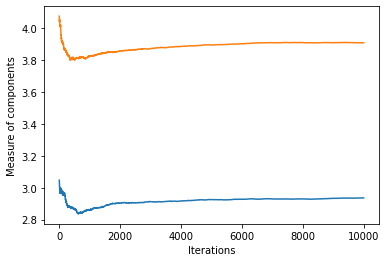

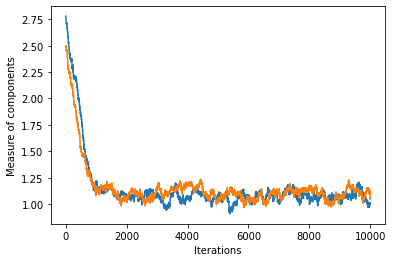

Best m for ELBO:  [2.93561033 3.90877475]
Best c for ELBO:  [1.01017978 1.05901523]
Best ELBO found:  -2.058143245678339


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.special as scs
import autograd.scipy.stats as stats
import autograd.scipy.integrate as integrate

# Define constants for mixture distribution
mu_mix = np.array([[-4.0, 2.0],
                   [-2.0, -3.5],
                   [0.0, 0.0],
                   [3.0, 4.0]])
nu_mix = np.array([40.0, 45.0, 3.0, 30.0])
w_mix = np.array([0.3, 0.21, 0.08, 0.41])

def logTarget(theta, mu = mu_mix, nu = nu_mix, w = w_mix):
    """Log pdf of the target distribution"""
    sum_log = stats.t.logpdf(theta[0], nu, loc=mu[:, 0]) + \
              stats.t.logpdf(theta[1], nu, loc=mu[:, 1])
    return scs.logsumexp (np.log(w) + sum_log, axis=0)

def lnormpdf(x, mu, sigma):
    """Log pdf of normal distribution with mean mu and standard deviation sigma."""
    return -0.5*np.log(2*np.pi*sigma**2) - 0.5*(x-mu)**2/sigma**2

def dsvi(sample_z, m0, c0, gradient, rho_0, record_history = False, niters=10000):
    """Doubly stochastic variational inference from
    Algorithm 1 of Titsias and Lázaro-Gredilla (2014)"""
    m = m0
    c = c0
    if record_history:
        mhist = np.zeros((niters, len(m0)))
        chist = np.zeros((niters, len(c0)))
    for t in range(niters):
        z = sample_z(size=2)
        theta = c*z + m
        g = gradient(theta)
        m = m + rho_0/(100 + t) * g
        c = c + rho_0/(100 + 2) * (g * z + 1/c)
        if record_history:
            mhist[t] = m
            chist[t] = np.abs(c)
    if record_history:
        return m, np.abs(c), mhist, chist
    return m, np.abs(c)

def estimate_elbo(m,c,logp,ns=1000):
    """Estimate ELBO via Monte Carlo."""
    # ELBO = E_q[log p] - E_q[log q]
    x = c * npr.randn(ns, 2) + m
    H = stats.multivariate_normal.entropy() # H = -E_q[log q] is the entropy of q
    log_mean = np.zeros(ns)
    log_ns = np.log(ns)
    
    # Calculate the expected value E_q[log p]
    for i in range(ns):
        log_mean[i] = logp(x[i]) - log_ns
    return scs.logsumexp(log_mean) + H

def plot_utility(history):
    plt.plot(history)
    plt.xlabel('Iterations')
    plt.ylabel('Measure of components')
    plt.show()
    return

def explore_wide_range_elbo(logTarget=logTarget, N_search = 10, change_m = False):
    """Function for initial parameter exploration. Looks for parameters that maximize the ELBO of the log target
    In a range defined by N_search. The parameter change_m defines which parameter is fixed; if true, c is fixed
    and the ELBO maximization is done by varying the value of m, otherwise m is fixed and ELBO maximization is
    done through variation in c
    RETURN VALUE: A tuple with the maximum ELBO estimated and the corresponding m or c"""
    opt_elbo = -np.inf
    opt_space = np.zeros(2)
    if change_m:
        # Search space for maximization of parameters for m
        prob_space_0 = np.linspace(-N_search, N_search, 2*N_search)
        prob_space_1 = np.linspace(-N_search, N_search, 2*N_search)
        
        for m0 in prob_space_0:
            for m1 in prob_space_1:
                tested_vars = np.array([m0, m1])
                m, c = dsvi(lambda size: npr.normal(size=size), tested_vars, 4*np.ones(2), autograd.grad(logTarget), 0.6, niters=500)
                elbo_estimated = estimate_elbo(m, c, logTarget, 500)
                if opt_elbo < elbo_estimated:
                    opt_elbo = elbo_estimated
                    opt_space = m
    else:
        # Search space for maximization of parameters for c. Since the absolute value of C is taken, we limit the
        # search to positives
        prob_space_0 = np.linspace(1, N_search, N_search)
        prob_space_1 = np.linspace(1, N_search, N_search)
        
        for c0 in prob_space_0:
            for c1 in prob_space_1:
                tested_vars = np.array([c0, c1])
                m, c = dsvi(lambda size: npr.normal(size=size), np.zeros(2), tested_vars, autograd.grad(logTarget), 0.6, niters=500)
                elbo_estimated = estimate_elbo(m, c, logTarget, 500)
                if opt_elbo < elbo_estimated:
                    opt_elbo = elbo_estimated
                    opt_space = c
    return opt_elbo, opt_space

npr.seed(0)
m0 = np.array( [ 3.06, 4.08 ] )
c0 = np.array( [ 2.8, 2.5 ] )
m, c, mv, cv = dsvi(lambda size: npr.normal(size=size), m0, c0, autograd.grad(logTarget), 0.5, True)

plot_utility(mv)
plot_utility(cv)

best_elbo = estimate_elbo(m,c,logTarget,ns=int(1e5))

print("Best m for ELBO: ", m)
print("Best c for ELBO: ", c)
print("Best ELBO found: ", best_elbo)

In [5]:
""" 
EXPLORATORY SEARCH FOR RANGE OF VALUES THAT MAXIMIZE ELBO

UNCOMMENT THE CODE IN THIS CELL TO LOOK FOR ELBO ESTIMATES IN A RANGE OF VALUES BETWEEN -10 AND 10
FOR BOTH M AND C. THE FUNCTION explore_wide_range_elbo() IS SLOW, SO IT IS RAN ONCE TO FIND A
ROUGH VALUE FOR M AND C TO FINE TUNE LATER
"""
npr.seed(0)
# m_elbo, m = explore_wide_range_elbo(change_m = True)
# print(m_elbo, m)
# c_elbo, c = explore_wide_range_elbo(change_m = False)
# print(c_elbo, c)

-3.1112840574868783 [3.06551126 4.08884018]
-3.4870120022091347 [2.79577688 2.5097207 ]


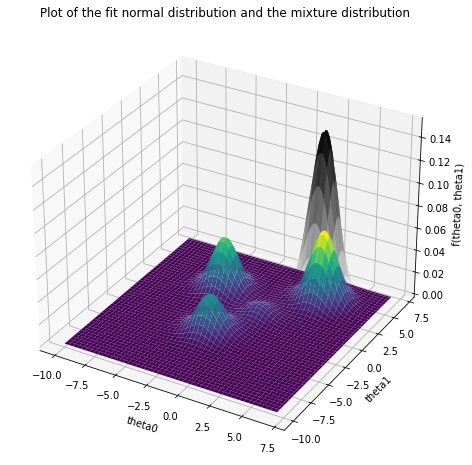

In [12]:
def visualize_fit():
    """VISUALIZATION OF THE FIT WITH THE TARGET MIXTURE DISTRIBUTION"""
    n = 100
    X = np.linspace(-10, 7, n)
    Y = np.linspace(-10, 7, n)
    # X = np.linspace(-7, 7, n)
    # Y = np.linspace(-7, 10, n)

    # Meshgrid and evaluation of the target and the multivariate normal distributions to visualize the fit
    X, Y = np.meshgrid(X,Y)
    Z_target = np.zeros( (n, n) )
    Z_q = np.zeros( (n, n) )
    for i in range(n):
        for j in range(n):
            Z_target[i][j] = np.exp(logTarget( np.array([X[i][j], Y[i][j]])))
            Z_q[i][j] = stats.multivariate_normal.pdf( np.array([X[i][j], Y[i][j]]), mean=m, cov=np.diag(c))

    # Creation of the plot
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z_target, cmap='viridis', edgecolor="none", label="target")
    ax.plot_surface(X, Y, Z_q, cmap='binary', label="fit")
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.set_zlabel("f(theta0, theta1)")
    ax.set_title("Plot of the fit normal distribution and the mixture distribution")
    # ax.view_init(90, 30)
    plt.show()
    return

visualize_fit()

#### Write your numerical answers below:

In [9]:
vp_means = m # do not hard-code the number: assign the variables used in your previous computations
vp_stds = c # do not hard-code the number: assign the variables used in your previous computations
best_elbo = best_elbo # do not hard-code the number: assign the variables used in your previous computations

print('Variational posterior means: {}'.format(vp_means))
print('Variational posterior standard deviations: {}'.format(vp_stds))
print('ELBO of best solution: {}'.format(best_elbo))

Variational posterior means: [2.93561033 3.90877475]
Variational posterior standard deviations: [1.01017978 1.05901523]
ELBO of best solution: -2.058143245678339


### Your textual answer explaining your solution:

The function `logTarget()` implements the log-target distribution as defined by the problem statement. 

The function `estimate_elbo():` calculates an estimation of the ELBO through a Monte Carlo approach. It calculates an approximation of the ELBO defined by the formula:

$$
\text{ELBO}(\psi) = \mathbb{E}_{q_\psi(\theta)}\left[ \log p_\text{target}(\theta)\right] - \mathbb{E}_{q_\psi(\theta)}\left[\log q_\psi(\theta)\right]
$$

This function was taken from the solutions for lecture 11 and adapted for the 2-dimensional theta of this case.

The function `dsvi()` is taken from the solution of week 5's assignment, it implements the doubly-stochastic variational inference algorithm proposed by Titsias and Lázaro-Gredilla (2014).

The function `explore_wide_range_elbo()`, serves as an exploration of a wide range of possible values for m and c to use in `dsvi()`. Since this is a gradient method, we should explore a relatively wide range of possible values for m and c so as to not get stuck in a local maximum, evaluating the maximized ELBO after running `dsvi()` at each point. To do this, we set fixed values for either m or c and calculate the maximum elbo by changing the values of the unfixed variables. This is just to get a rough view of which range of values should be used on each parameter to maximize ELBO. To make sure that the solution isn't overfitting to some local maximum, different fixed values of m and c were tested to check for the values of ELBO, with which we get values for m around `[3, 4]` and values for c around `[1, 1]`. This is a hint that the gaussian approximation is mostly wrapping around the Student T distribution of the mixture that has a mean around `[3, 4]`

After finding the range of values for maximized ELBO, we run `dsvi()` with a finer rho around the points obtained in the previous point to fine tune the values of `m` and `c`, and then we can diagnose if they have converged by plotting their variational optimization trace. We can see that the values of standard deviation fluctuate within a band of around 0.1, which may be due to the approximation of the mixture distribution with just a normal distribution. Since the target distribution is multimodal, the standard deviation of the normal distribution being fit may be hard to estimate.

Another visual aid was made to visually validate the fit with the function `visualize_fit()`. Matplotlib is known because its 3d surfaces overlap weirdly, which can be seen [here](https://github.com/matplotlib/matplotlib/issues/12620/) and [here](https://stackoverflow.com/questions/13932150/matplotlib-wrong-overlapping-when-plotting-two-3d-surfaces-on-the-same-axes), so it may not be so clear, but this plot gives a visual confirmation that indeed the gaussian fit is just wrapping the Student T distribution with the biggest weight in the mixture model. This is similar to what was seen in lecture 11's example with a multimodal distribution, where the gaussian fit just wrapped around one of the modes.